In [1]:
!pip install torch_geometric
!pip install e3nn
!pip install nequip==0.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 448.0/448.0 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
#Installing pair nequip
!git clone https://github.com/mir-group/pair_nequip_allegro.git

#Installing and building lammps
!rm -rf /content/lammps
!git clone --depth=1 https://github.com/lammps/lammps

!cd pair_nequip_allegro && bash patch_lammps.sh ../lammps/

!cd lammps && rm -rf build && mkdir build && cd build && cmake ../cmake -DCMAKE_PREFIX_PATH=`python -c 'import torch;print(torch.utils.cmake_prefix_path)'` -DMKL_INCLUDE_DIR=/tmp && make -j$(nproc)

Cloning into 'pair_nequip_allegro'...
remote: Enumerating objects: 538, done.
remote: Counting objects: 100% (256/256), done.
remote: Compressing objects: 100% (126/126), done.
remote: Total 538 (delta 172), reused 195 (delta 122), pack-reused 282 (from 1)
Receiving objects: 100% (538/538), 318.19 KiB | 9.36 MiB/s, done.
Resolving deltas: 100% (295/295), done.
Cloning into 'lammps'...
remote: Enumerating objects: 14396, done.
remote: Counting objects: 100% (14396/14396), done.
remote: Compressing objects: 100% (10341/10341), done.
remote: Total 14396 (delta 4975), reused 7911 (delta 3814), pack-reused 0 (from 0)
Receiving objects: 100% (14396/14396), 133.66 MiB | 20.04 MiB/s, done.
Resolving deltas: 100% (4975/4975), done.
Updating files: 100% (13732/13732), done.
Copying files...
Updating CMakeLists.txt...
Done!
CMake Deprecation Warning at CMakeLists.txt:21 (cmake_policy):
  The OLD behavior for policy CMP0109 will be removed from a future version
  of CMake.

  The cmake-policies(7)

# Tutorial Example

In [15]:
#Downloading required dataset and configuration file
!wget --quiet https://github.com/mir-group/nequip-tutorial/raw/refs/heads/main/config.yaml
!wget --quiet https://github.com/mir-group/nequip-tutorial/raw/refs/heads/main/sitraj.xyz

#Training
!rm -rf ./results
!mkdir ./results
!nequip-train -cn config.yaml

[2025-05-06 04:01:23,681][nequip.utils.versions][INFO] - [rank: 0] Version Information:
[2025-05-06 04:01:23,681][nequip.utils.versions][INFO] - [rank: 0] torch 2.6.0+cu124
[2025-05-06 04:01:23,681][nequip.utils.versions][INFO] - [rank: 0] e3nn 0.5.6
[2025-05-06 04:01:23,681][nequip.utils.versions][INFO] - [rank: 0] nequip 0.7.0
[2025-05-06 04:01:23,681][nequip.scripts.train][INFO] - [rank: 0] This `nequip-train` run will perform the following tasks: ['train', 'test']
[2025-05-06 04:01:23,682][nequip.scripts.train][INFO] - [rank: 0] and use the output directory provided by Hydra: /content/outputs/2025-05-06/04-01-23
[2025-05-06 04:01:23,701][nequip.scripts.train][INFO] - [rank: 0] Building datamodule ...
[2025-05-06 04:01:23,709][nequip.data.datamodule._base_datamodule][INFO] - [rank: 0] Found 1 training dataset(s), 1 validation dataset(s), 1 test dataset(s), and 0 predict dataset(s).
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, 

In [4]:
# @title Plotting training metrics
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
from typing import Literal

colors_dict = {
    "forces_mae": "#d51700",
    "forces_mse": "#d51700",
    # "forces_rmse": "#9437ff",
    "per_atom_energy_mae": "#0096ff",
    "per_atom_energy_mse": "#0096ff",
    # "per_atom_energy_rmse": "#0096ff",
    "total_energy_mae": "#0433ff",
    "total_energy_mse": "#0433ff",
    # "total_energy_rmse": "red",
    "weighted_sum": "#9437ff",
}

def get_metrics(df,
                group: Literal["train", "val"] = "train",
                type: Literal["loss", "metric"] = "metric"):

    if group == "train":
        column_names = [column for column in df.columns if
                        all(["epoch" in column, group in column, type in column])]
    else:
        column_names = [column for column in df.columns if
                        all(["epoch" in column, group in column])]
    columns_to_keep = ["epoch"] + column_names
    df = df[columns_to_keep]
    df = df.dropna(axis=0, subset=column_names)
    renamed_columns = {column: column.split("/")[-1] for column in column_names}
    df = df.rename(columns=renamed_columns)
    return df, renamed_columns.values()

def plot_metric_in_ax(ax, df,
                 group: Literal["train", "val"] = "train",
                 type: Literal["loss", "metric"] = "metric"):
    group_names={"train": "Training", "val": "Validation", "test": "Testing"}
    type_names={"loss": "loss", "metric": "metrics"}
    df, metric_names= get_metrics(df, group=group, type=type)
    lines, labels = [], []
    if type=="metric":
      ax2 = ax.twinx()
      legend_x = 1.3
      for metric in metric_names:
        label = metric.split("/")[0]
        if label not in colors_dict:
          continue
        if "weighted" in metric:
          continue
        if "force" in metric:
          line, = ax2.plot(df["epoch"], df[metric], color=colors_dict[label])
        else:
          line, = ax.plot(df["epoch"], df[metric], color=colors_dict[label])
        lines.append(line)
        labels.append(label)
      ax.set_ylabel("[eV]")
      ax2.set_ylabel("[eV/Å]")
    else:
      legend_x = 1.0
      for metric in metric_names:
        label = metric.split("/")[0]
        if label not in colors_dict:
          continue
        line, = ax.plot(df["epoch"], df[metric], color=colors_dict[label])
        lines.append(line)
        labels.append(label)
    ax.legend(lines, labels, bbox_to_anchor=(legend_x, 1), loc='upper left', fontsize=10)

    # log axis:
    ax.set_yscale("log")
    ax.set_xlabel("Epoch")
    # ax.set_ylabel(f"{group_names[group]} {type_names[type]}")
    ax.set_title(f"{group_names[group]} {type_names[type]}")

def plot_metrics(df):
    fig, ax = plt.subplots(2, 2, figsize=(14, 8))
    plot_metric_in_ax(ax[0,0], df, group='train', type="loss")
    plot_metric_in_ax(ax[0,1], df, group='train', type="metric")
    plot_metric_in_ax(ax[1,0], df, group='val', type="loss")
    plot_metric_in_ax(ax[1,1], df, group='val', type="metric")
    plt.tight_layout()
    plt.show()

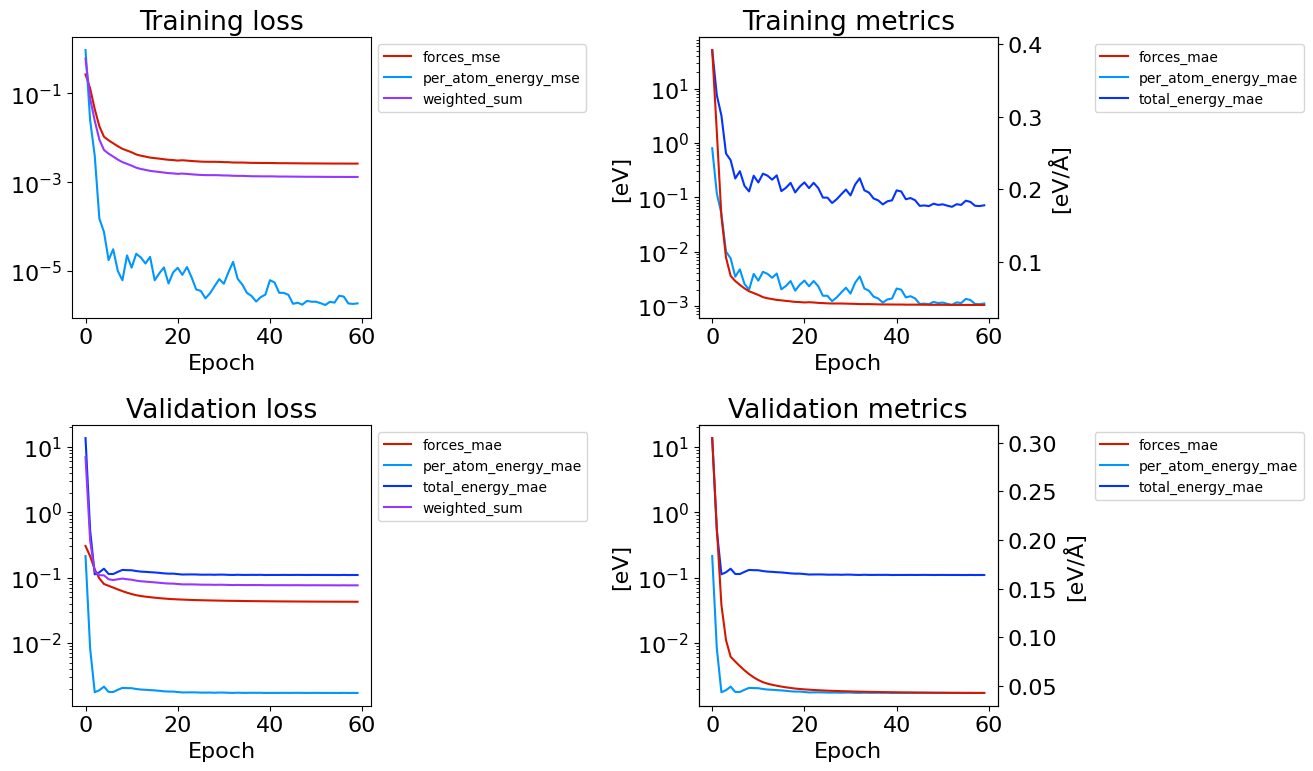

In [16]:
metrics_path = "/content/results/tutorial_log/version_0/metrics.csv"
metrics_df = pd.read_csv(metrics_path)

plot_metrics(metrics_df)

# MD-17 Small Molecule Dynamics Example

### Dataset Conversion Function

In [5]:
from ase import Atoms
from ase.io import read, write
import numpy as np

def convert_dataset(input_file, output_file):
    """Convert your custom format to ASE-readable XYZ with energy/forces"""

    frames = []
    with open(input_file, 'r') as f:
        while True:
            # Read header line with atom count
            header = f.readline()
            if not header:
                break  # End of file
            n_atoms = int(header.strip())

            # Read energy line
            energy = float(f.readline().strip())

            # Read atom lines
            symbols = []
            positions = []
            forces = []
            for _ in range(n_atoms):
                parts = f.readline().split()
                symbols.append(parts[0])
                positions.append([float(x) for x in parts[1:4]])
                forces.append([float(x) for x in parts[4:7]])

            # Create ASE Atoms object
            atoms = Atoms(
                symbols=symbols,
                positions=positions,
                pbc=False  # Assuming non-periodic system
            )
            atoms.info['energy'] = energy
            atoms.arrays['forces'] = np.array(forces)

            frames.append(atoms)

    # Write all frames to new XYZ file
    write(output_file, frames, format='extxyz')

## Aspirin

In [5]:
!curl -L -o Aspirin_cropped.xyz https://raw.githubusercontent.com/Seth-Honnigford/ME697/main/Aspirin_cropped.xyz
!curl -L -o aspirin.yaml https://raw.githubusercontent.com/Seth-Honnigford/ME697/main/aspirin.yaml

convert_dataset("Aspirin_cropped.xyz", "Aspirin_formatted.xyz")

#Training
!rm -rf ./results
!mkdir ./results
!nequip-train -cn aspirin.yaml

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1945k  100 1945k    0     0  3275k      0 --:--:-- --:--:-- --:--:-- 3280k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3377  100  3377    0     0   7312      0 --:--:-- --:--:-- --:--:--  7325
[2025-05-06 15:00:26,587][nequip.utils.versions][INFO] - [rank: 0] Version Information:
[2025-05-06 15:00:26,587][nequip.utils.versions][INFO] - [rank: 0] torch 2.6.0+cu124
[2025-05-06 15:00:26,587][nequip.utils.versions][INFO] - [rank: 0] e3nn 0.5.6
[2025-05-06 15:00:26,587][nequip.utils.versions][INFO] - [rank: 0] nequip 0.7.0
[2025-05-06 15:00:26,588][nequip.scripts.train][INFO] - [rank: 0] This `nequip-train` run will perform the following tasks: ['train', 'test']
[2025-05-06 15:00:26,588][nequip.scripts.train][INFO]

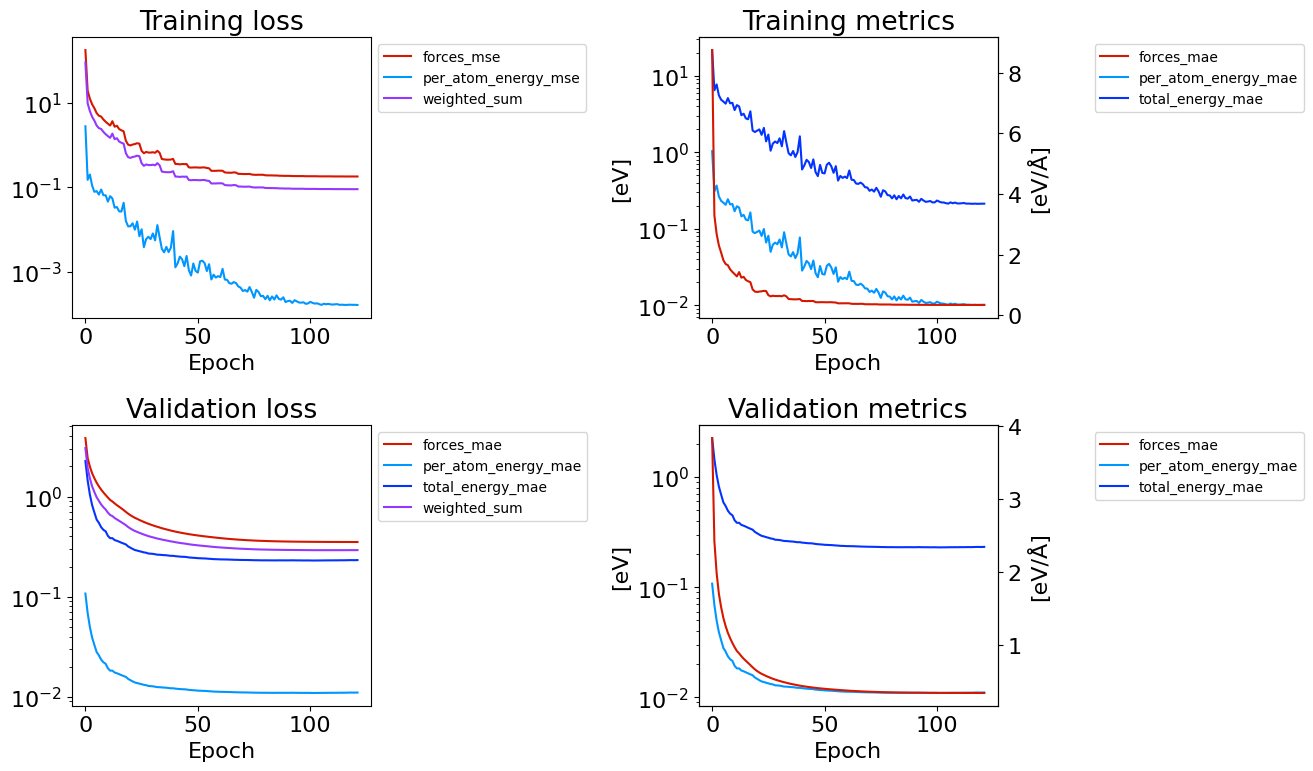

In [6]:
metrics_path = "/content/results/aspirin_log/version_0/metrics.csv"
metrics_df = pd.read_csv(metrics_path)

plot_metrics(metrics_df)

## Benzene

In [7]:
!curl -L -o benzene_cropped.xyz https://raw.githubusercontent.com/Seth-Honnigford/ME697/main/benzene_cropped.xyz
!curl -L -o benzene.yaml https://raw.githubusercontent.com/Seth-Honnigford/ME697/main/benzene.yaml

convert_dataset("benzene_cropped.xyz", "benzene_formatted.xyz")

#Training
!rm -rf ./results
!mkdir ./results
!nequip-train -cn benzene.yaml

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  831k  100  831k    0     0  3749k      0 --:--:-- --:--:-- --:--:-- 3746k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3370  100  3370    0     0  22705      0 --:--:-- --:--:-- --:--:-- 22770
[2025-05-06 16:49:29,159][nequip.utils.versions][INFO] - [rank: 0] Version Information:
[2025-05-06 16:49:29,159][nequip.utils.versions][INFO] - [rank: 0] torch 2.6.0+cu124
[2025-05-06 16:49:29,159][nequip.utils.versions][INFO] - [rank: 0] e3nn 0.5.6
[2025-05-06 16:49:29,159][nequip.utils.versions][INFO] - [rank: 0] nequip 0.7.0
[2025-05-06 16:49:29,159][nequip.scripts.train][INFO] - [rank: 0] This `nequip-train` run will perform the following tasks: ['train', 'test']
[2025-05-06 16:49:29,160][nequip.scripts.train][INFO]

## Ethanol

In [ ]:
!curl -L -o ethanol_cropped.xyz https://raw.githubusercontent.com/Seth-Honnigford/ME697/main/ethanol_cropped.xyz
!curl -L -o ethanol.yaml https://raw.githubusercontent.com/Seth-Honnigford/ME697/main/ethanol.yaml

convert_dataset("ethanol_cropped.xyz", "ethanol_formatted.xyz")

#Training
!rm -rf ./results
!mkdir ./results
!nequip-train -cn ethanol.yaml

## Malonaldehyde

In [ ]:
!curl -L -o malonaldehyde_cropped.xyz https://raw.githubusercontent.com/Seth-Honnigford/ME697/main/malonaldehyde_cropped.xyz
!curl -L -o malonaldehyde.yaml https://raw.githubusercontent.com/Seth-Honnigford/ME697/main/malonaldehyde.yaml

convert_dataset("malonaldehyde_cropped.xyz", "malonaldehyde_formatted.xyz")

#Training
!rm -rf ./results
!mkdir ./results
!nequip-train -cn malonaldehyde.yaml

## Naphthalene

In [ ]:
!curl -L -o naphthalene_cropped.xyz https://raw.githubusercontent.com/Seth-Honnigford/ME697/main/naphthalene_cropped.xyz
!curl -L -o naphthalene.yaml https://raw.githubusercontent.com/Seth-Honnigford/ME697/main/naphthalene.yaml

convert_dataset("naphthalene_cropped.xyz", "naphthalene_formatted.xyz")

#Training
!rm -rf ./results
!mkdir ./results
!nequip-train -cn naphthalene.yaml

## Salicylic

In [ ]:
!curl -L -o salicylic_cropped.xyz https://raw.githubusercontent.com/Seth-Honnigford/ME697/main/salicylic_cropped.xyz
!curl -L -o salicylic.yaml https://raw.githubusercontent.com/Seth-Honnigford/ME697/main/salicylic.yaml

convert_dataset("salicylic_cropped.xyz", "salicylic_formatted.xyz")

#Training
!rm -rf ./results
!mkdir ./results
!nequip-train -cn salicylic.yaml

## Toluene

In [ ]:
!curl -L -o toluene_cropped.xyz https://raw.githubusercontent.com/Seth-Honnigford/ME697/main/toluene_cropped.xyz
!curl -L -o toluene.yaml https://raw.githubusercontent.com/Seth-Honnigford/ME697/main/toluene.yaml

convert_dataset("toluene_cropped.xyz", "toluene_formatted.xyz")

#Training
!rm -rf ./results
!mkdir ./results
!nequip-train -cn toluene.yaml

## Uracil

In [ ]:
!curl -L -o uracil_cropped.xyz https://raw.githubusercontent.com/Seth-Honnigford/ME697/main/uracil_cropped.xyz
!curl -L -o uracil.yaml https://raw.githubusercontent.com/Seth-Honnigford/ME697/main/uracil.yaml

convert_dataset("uracil_cropped.xyz", "uracil_formatted.xyz")

#Training
!rm -rf ./results
!mkdir ./results
!nequip-train -cn uracil.yaml